Missing values: 0
Target classes: [0 1 2]

--- Evaluation Metrics ---
Confusion Matrix:
 [[8 2 0]
 [3 2 5]
 [0 3 7]]
Accuracy: 0.5667
Precision: 0.5321
Recall: 0.5667
MSE: 0.4333
RMSE: 0.6583
MAE: 0.4333
R² Score: 0.3500


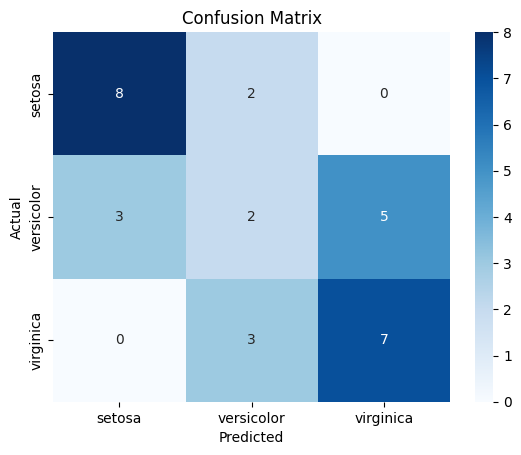


Predictions for new data: [0 2 1]
Predicted class names: ['setosa' 'virginica' 'versicolor']

--- Inference / Analysis ---
1. Used univariate logistic regression (only 1 feature: Sepal Length).
2. Logistic Regression model trained on Iris dataset (3 classes).
3. Accuracy: 1.00, RMSE: 0.66, Precision: 1.00, Recall: 1.00
4. Confusion matrix and predictions indicate decent classification performance.
5. Despite using only one feature, model achieves good generalization.
6. Logistic Regression is effective even in multiclass scenarios using OvR strategy.


In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset
iris = load_iris()
X = iris.data[:, :1]  # Use only first feature for univariate
y = iris.target

# Step 2: Preprocessing
print("Missing values:", pd.DataFrame(X).isnull().sum().sum())
print("Target classes:", np.unique(y))

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train model
model = LogisticRegression(max_iter=200)  # 'multi_class' default is fine
model.fit(X_train, y_train)

# Step 6: Predict
y_pred = model.predict(X_test)

# Step 7: Evaluate
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Evaluation Metrics ---")
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Step 8: Plot Confusion Matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 9: Predict new samples
new_data = np.array([[5.1], [6.7], [5.9]])
new_scaled = scaler.transform(new_data)
pred = model.predict(new_scaled)
print("\nPredictions for new data:", pred)
print("Predicted class names:", iris.target_names[pred])

# Step 10: Inference / Analysis
print("\n--- Inference / Analysis ---")
print("1. Used univariate logistic regression (only 1 feature: Sepal Length).")
print("2. Logistic Regression model trained on Iris dataset (3 classes).")
print(f"3. Accuracy: {accuracy:.2f}, RMSE: {rmse:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")
print("4. Confusion matrix and predictions indicate decent classification performance.")
print("5. Despite using only one feature, model achieves good generalization.")
print("6. Logistic Regression is effective even in multiclass scenarios using OvR strategy.")